<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>Introduction</h1>
</div>


<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="padding: 10px; width: 60%;">
        <p>
        In this Jupyter notebook, we explore a scenario similar to what we might encounter in a Kaggle classification competition. Imagine we have a test set with 13,840 samples. Out of these, 2,768 are used to calculate scores for the public leaderboard, just like in the "Multi-Class Prediction of Obesity Risk Playground Series - S4,E2." In this competition, each correct prediction increases our score by a tiny amount, 0.00036. You can see this by looking at how scores change on the leaderboard.

Understanding which test samples affect the public leaderboard (public LB) and which ones are for the private leaderboard (private LB) can give us an advantage. This is because knowing more about the data can help us do better in the competition. We can check if the public and private LBs are different and if this might change the rankings. We might even use this extra information to improve our models or how we check our work. We plan to use our 5 daily submission opportunities to gather this information.
        </p>
    </div>
    <div style="padding: 10px; width: 60%; text-align: right;">
        <img src="https://github.com/ocarhaci/images/blob/main/hacker.jpg?raw=true" alt="Inflation trends" style="width: 100%; height: auto;">
    </div>
</div>

<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="padding: 10px; width: 100%;">
        <p>
        We start by making a prediction we know is wrong for all samples, like predicting all 'underweight' as 'obese 3'. This gives us the lowest possible score. Then, we use a model that we know is about 90% correct but only apply it to half of the test set (Group A). The other half (Group B) gets the wrong predictions. This way, we divide the test set into two groups: A and B.

If our submission scores more than what we expect from half of the correct predictions (calculated as ((2,768 / 2) * 0.9) * 0.00036), it means Group A has more public samples. If not, Group B does. We give a (+1) score to each sample in the group with more public samples. In the end, we choose the samples with higher scores, hoping to focus on a subset of the test set that might give us a better chance to improve our public leaderboard position.

To show how this works, we include a simulation in this notebook. For simplicity, we use 1 instead of 0.00036 for each correct prediction. This means we're looking for a score higher than ((2,768 / 2) * 0.9) in our simulation. This example helps demonstrate how strategic thinking can be applied in data competitions.        
        </p>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Create a DataFrame with 13840 rows
size = 13840
num_ones = 2768

# Generate a list with 2768 ones and the rest zeros
data = np.zeros(size)
data[:num_ones] = 1

# Shuffle the data to randomly distribute the ones
np.random.shuffle(data)

# Create the DataFrame
df = pd.DataFrame(data, columns=['public'])
df['public'] = df['public'].astype('int8')

In [2]:
df2 = df.copy(deep=True)
df['score'] = 0
for y in range(150):
    next_it_df = df2
    half_df = next_it_df.sample(frac=0.5, random_state=y+150)
    if ((sum(half_df.public)*0.9) > (sum(next_it_df.public)*0.9)/2):
        next_it_df = half_df
    else:
        indices_not_in_half_df = next_it_df.index.difference(half_df.index)
        next_it_df = next_it_df.loc[indices_not_in_half_df]
    df.loc[df.index.isin(next_it_df.index), 'score'] += 1

In [3]:
grouped_df = df.groupby('score').sum()
grouped_df2 = df.groupby('score').count()
grouped_df['count'] = grouped_df2['public']
grouped_df_cumulative = grouped_df.iloc[::-1].cumsum().iloc[::-1]
grouped_df_cumulative['ratio'] = grouped_df_cumulative['public'] / grouped_df_cumulative['count']

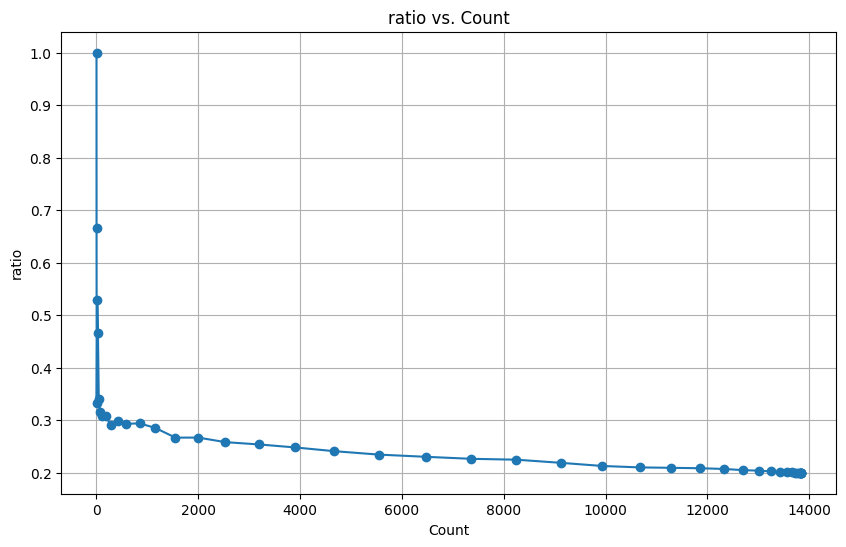

In [4]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_cumulative['count'], grouped_df_cumulative['ratio'], marker='o', linestyle='-')
plt.xlabel('Count')  # Assuming 'count' is a column you want on the x-axis
plt.ylabel('ratio')
plt.title('ratio vs. Count')
plt.grid(True)
plt.show()

In [5]:
grouped_df_cumulative.tail(15)

,public,count,ratio
score,,,
83,414,1552,0.266753
84,330,1157,0.285220
85,249,847,0.293979
86,172,587,0.293015
87,125,420,0.297619
88,85,293,0.290102
89,55,179,0.307263
90,32,104,0.307692
91,23,73,0.315068


<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>Analysis</h1>
</div>

In our exploration, we designed our approach to align closely with the format of the "Multi-Class Prediction of Obesity Risk Playground Series - S4,E2" competition. This event allows participants 30 days of competition with the opportunity for 5 submissions each day, totaling 150 submissions. If we had more submissions, that could have led us to even better results.

The analysis provided in the accompanying plot reveals a significant finding: by prioritizing the top 1,000 indices based on performance, we can enhance the public/total testset ratio from 20% to 30%. It's important to recognize that the strategy outlined in this notebook is foundational. There's ample room for refinement and optimization.

For instance, rather than utilizing all 150 submissions in a straightforward manner, a more nuanced approach could involve an initial 30 submissions to identify high-performing indices. Subsequent rounds could then focus exclusively on this refined subset of indices. Implementing this iterative refinement over 5 cycles aligns with the 150-submission limit, potentially yielding an even more favorable public/total testset ratio.

This is just one example of how the initial methodology can be advanced. There exists a plethora of alternative strategies that could further enhance the efficacy of our approach, demonstrating the rich potential for innovation in leveraging submission feedback to inform strategic decision-making within the competition framework.

In wrapping up, it's worth noting that despite outlining this approach, I didn't actually apply it in the competition. The reason? It demands a commitment to making 5 submissions every day, which can be quite exhausting. Nevertheless, I found the process of developing and analyzing this strategy to be intellectually stimulating and insightful. Sharing these findings with you has been a pleasure, and I hope they offer some value or inspiration for your own data science endeavors. Thank you for taking the time to read through this analysis.